<br>

<b><font size=22> Big data and Marketing </font></b>

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>Ange Michel</font>**

**<font color = salmon>MASTER 2 EBDS</font>**


In [73]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
from nltk.stem import WordNetLemmatizer # preserves the root of words so that two words with the same stem will be considered as one and the same word
import re

In [76]:
link_file = "https://raw.githubusercontent.com/lilyhuong/Bigdata-and-marketing/master/covid19_tweets.csv?token=GHSAT0AAAAAAB23GAOQ5DOCE4HICMBCATKYY3TXACQ"
df = pd.read_csv('/Users/lilyhuong/Desktop/Amse mag3/Bigdata and marketing/covid19_tweets.csv')

In [60]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [77]:
df = df.sample(frac=0.03 , random_state = 123)

In [78]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
50143,GoodMorningWilton,"Wilton, CT 06897","#WiltonCT's go-to news source. Daily, GOOD new...",2013-04-03 19:13:57,1234,451,765,False,2020-07-31 17:34:35,"Analyzing School Reopening Details, Wilton BOE...",NaN,TweetDeck,False
52558,Mitchel Bell,Washington DC Metro,Uber sales guy - Hunter - Focus is on sales pe...,2010-02-20 19:28:20,83,92,7,False,2020-08-01 19:00:19,NICE Satmetrix Benchmark finds 57% of contact ...,NaN,Oktopost,False
3866,PIB India,New Delhi,Press Information Bureau. Nodal agency for com...,2010-12-27 11:55:36,2063891,265,2149,True,2020-07-25 10:05:16,"#CoronaWatch\n\n◾ 13,36,861 total confirmed ca...",['CoronaWatch'],Twitter Web App,False
67077,Daniel Mumby,Chard,"Christian, journalist, film buff, cricket fan ...",2012-07-08 15:15:19,678,981,8961,False,2020-08-04 07:52:32,"""XR f***s up so often because we became way to...",NaN,Twitter for Android,False
153918,Jimmy Kokinakes,"Kankakee, IL","There are no small audiences, only small comic...",2014-05-31 18:52:32,1112,2081,8843,False,2020-08-18 16:17:44,@realDonaldTrump America's most DISGRUNTLED EM...,['COVID19'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114102,Dan Male,"London, England","Editor of @ICJnews, @TalentJournal and @WMJnew...",2016-07-17 14:10:57,164,484,1276,False,2020-08-12 07:31:15,Karamjit is absolutely right to talk about the...,['NHS'],Twitter for iPhone,False
67848,The New Indian Express,Chennai,All the tweets for breaking news & views.\nFac...,2009-12-05 09:24:55,446499,552,540,True,2020-08-04 07:28:56,UN chief says over one billion students are af...,['COVID19'],Twitter Web App,False
142615,Diamond Q,"Oklahoma City, OK",👀 follow or you gay,2020-06-21 01:56:52,18,15,29,False,2020-08-17 06:59:50,Follow or you gay 👀 #DarceyAndStacey #PValley ...,"['DarceyAndStacey', 'PValley', '90DayFianceHap...",Twitter for iPhone,False
61053,Richard herlihy,NaN,NaN,2013-05-04 20:35:52,86,392,177,False,2020-08-02 20:36:26,@L5Roby @ChristianDMZ @andifasano @meliswein @...,['Mets'],Twitter for iPhone,False


In [80]:
df.to_csv('data.csv')

In [24]:
#df2 = df.iloc[:5500] 

## Exploratory Data Analysis

In [63]:
df.drop_duplicates(subset='text',inplace=True)

From this step, we haad remove 425 duplicate tweet that duplicate 

<AxesSubplot:xlabel='is_retweet', ylabel='count'>

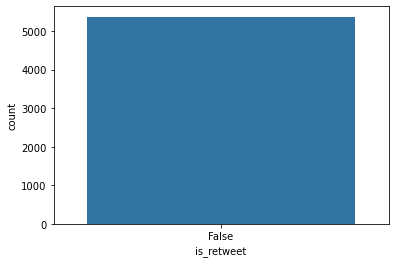

In [64]:

import seaborn as sns
sns.countplot(x = 'is_retweet', data = df)

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lilyhuong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* transform tweet text into lowercase
* remove twitter handles
* remove hyperlinks
* remove non-alphanumeric characters such as punctuation marks
* remove whitespace

In [66]:
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)

In [67]:
df['processed_text'] = df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_88069/1315216143.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_text'] = df['text'].str.lower()\


In [68]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df['stemmed'] = df['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [69]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,processed_text,stemmed
115654,Integral Overview,Israel ישראל,Researches and learns the wisdom of connection...,2017-09-22 13:52:37,526,538,6265,False,2020-08-12 06:36:58,We must recognize the fact that there is an ab...,NaN,Twitter Web App,False,"[must, recognize, fact, absolute, connection, ...","[must, recogn, fact, absolut, connect, part, w..."
139000,Gene Bulmer,East Coast,"#ChristFollower, #Leader, Husband, Father, #Ru...",2014-11-10 22:43:27,108,182,697,False,2020-08-16 03:05:47,"And then it hit me . . .\n\n. . . suppose, in ...",['WeThePeople'],Twitter for iPhone,False,"[hit, suppose, answer, faux, epidemic, lockdow...","[hit, suppos, answer, faux, epidem, lockdown, ..."
132461,E Would,Bay Area,Look at that sunset 🌅,2010-12-29 16:55:07,44,112,2322,False,2020-08-14 01:20:56,@realDonaldTrump @KamalaHarris Wear a mask for...,['KamalaHarris'],Twitter for iPhone,False,"[wear, mask, next, 3, months, kamalaharris]","[wear, mask, next, 3, month, kamalaharri]"
45107,Pandemic Predictor,NaN,An automatic tool for monitoring and forecast ...,2020-07-15 17:27:34,4,0,0,False,2020-07-31 19:07:11,Forecast for USA 31/07/2020 - 05/08/2020 #coro...,"['coronavirus', 'COVID19']",Twitter Web App,False,"[forecast, usa, 31, 07, 2020, 05, 08, 2020, co...","[forecast, usa, 31, 07, 2020, 05, 08, 2020, co..."
57147,Gregory D. Evans,United States,Gregory D. Evans is a #CyberSecurity #Mogul & ...,2010-09-23 20:48:59,7172,1128,246,False,2020-08-01 16:42:40,Children and young people call for increased s...,"['covid19', 'kids', 'childern']",WordPress.com,False,"[children, young, people, call, increased, sup...","[children, young, peopl, call, increas, suppor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32289,Veeresh Malik ವೀರೇಶ್ ಮಲಿಕ್ वीरेश मलिक ਵੀਰੇਸ਼ ਮਲਿਕ,New Delhi & Goa,General Category First Generation Zero Restart...,2011-03-17 13:45:07,1785,487,2071,False,2020-07-28 06:37:03,@rameshi1 @ShefVaidya @PetaIndia The complete ...,NaN,Twitter Web App,False,"[complete, movement, live, animal, wet, hide, ...","[complet, movement, live, anim, wet, hide, tan..."
140695,US Mission to the AU,"Addis Ababa, Ethiopia",U.S. Mission to the African Union,2012-07-10 08:06:14,9000,617,1954,False,2020-08-17 08:05:07,.@CDCgov recently announces that people who ha...,['COVID19'],Hootsuite Inc.,False,"[recently, announces, people, tested, positive...","[recent, announc, peopl, test, posit, covid19,..."
98110,GlendaleChamber,"Denver, CO",The Greater Glendale Chamber of Commerce \r\nP...,2010-08-02 19:02:55,269,242,335,False,2020-08-10 16:21:11,Make sure you visit AFC Urgent Care Denver Hig...,['COVID19'],Twitter for Android,False,"[make, sure, visit, afc, urgent, care, denver,...","[make, sure, visit, afc, urgent, care, denver,..."
64878,Dhananjay Shenoi | धनंजय शेनॉय 🇮🇳 🚩,"Kerala,Bharat",GSBian | Utd❤️ | SwayamSevak |Inspiration:@nar...,2017-08-12 11:01:27,584,500,83351,False,2020-08-02 18:10:43,Seems like BJP had given orders to party Presi...,['COVID19'],Twitter for Android,False,"[seems, like, bjp, given, orders, party, presi...","[seem, like, bjp, given, order, parti, presid,..."


Statistical approaches such as machine learning and deep learning work well with numerical data. However, natural language consists of words and sentences. Therefore, before you can build a sentiment analysis model, you need to convert text to numbers

In [70]:
!pip install Levenshtein

In [71]:
import networkx as nx
import Levenshtein
import random
import itertools 

In [72]:
def compare(tweet1, threshold=0.7):
    # compare tweets using Levenshtein distance (or whatever string comparison metric) 
    matches = df['text'].apply(lambda tweet2: (Levenshtein.ratio(tweet1, tweet2) >= threshold))

    # get positive matches
    matches = matches[matches].index.tolist()

    # convert to list of tuples
    return [*zip(iter(matches[:-1]), iter(matches[1:]))]

# create graph objects
nodes = df.index.tolist()
edges = [*itertools.chain(*df["text"].apply(compare))]

# create graphs
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# get connected component indexes
grouped_indexes = [*nx.connected_components(G)]

# get a random choice index from each group
filtered_indexes = [random.choice([*_]) for _ in grouped_indexes]

df.loc[filtered_indexes]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,processed_text,stemmed
115654,Integral Overview,Israel ישראל,Researches and learns the wisdom of connection...,2017-09-22 13:52:37,526,538,6265,False,2020-08-12 06:36:58,We must recognize the fact that there is an ab...,NaN,Twitter Web App,False,"[must, recognize, fact, absolute, connection, ...","[must, recogn, fact, absolut, connect, part, w..."
139000,Gene Bulmer,East Coast,"#ChristFollower, #Leader, Husband, Father, #Ru...",2014-11-10 22:43:27,108,182,697,False,2020-08-16 03:05:47,"And then it hit me . . .\n\n. . . suppose, in ...",['WeThePeople'],Twitter for iPhone,False,"[hit, suppose, answer, faux, epidemic, lockdow...","[hit, suppos, answer, faux, epidem, lockdown, ..."
132461,E Would,Bay Area,Look at that sunset 🌅,2010-12-29 16:55:07,44,112,2322,False,2020-08-14 01:20:56,@realDonaldTrump @KamalaHarris Wear a mask for...,['KamalaHarris'],Twitter for iPhone,False,"[wear, mask, next, 3, months, kamalaharris]","[wear, mask, next, 3, month, kamalaharri]"
45107,Pandemic Predictor,NaN,An automatic tool for monitoring and forecast ...,2020-07-15 17:27:34,4,0,0,False,2020-07-31 19:07:11,Forecast for USA 31/07/2020 - 05/08/2020 #coro...,"['coronavirus', 'COVID19']",Twitter Web App,False,"[forecast, usa, 31, 07, 2020, 05, 08, 2020, co...","[forecast, usa, 31, 07, 2020, 05, 08, 2020, co..."
57147,Gregory D. Evans,United States,Gregory D. Evans is a #CyberSecurity #Mogul & ...,2010-09-23 20:48:59,7172,1128,246,False,2020-08-01 16:42:40,Children and young people call for increased s...,"['covid19', 'kids', 'childern']",WordPress.com,False,"[children, young, people, call, increased, sup...","[children, young, peopl, call, increas, suppor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32289,Veeresh Malik ವೀರೇಶ್ ಮಲಿಕ್ वीरेश मलिक ਵੀਰੇਸ਼ ਮਲਿਕ,New Delhi & Goa,General Category First Generation Zero Restart...,2011-03-17 13:45:07,1785,487,2071,False,2020-07-28 06:37:03,@rameshi1 @ShefVaidya @PetaIndia The complete ...,NaN,Twitter Web App,False,"[complete, movement, live, animal, wet, hide, ...","[complet, movement, live, anim, wet, hide, tan..."
140695,US Mission to the AU,"Addis Ababa, Ethiopia",U.S. Mission to the African Union,2012-07-10 08:06:14,9000,617,1954,False,2020-08-17 08:05:07,.@CDCgov recently announces that people who ha...,['COVID19'],Hootsuite Inc.,False,"[recently, announces, people, tested, positive...","[recent, announc, peopl, test, posit, covid19,..."
98110,GlendaleChamber,"Denver, CO",The Greater Glendale Chamber of Commerce \r\nP...,2010-08-02 19:02:55,269,242,335,False,2020-08-10 16:21:11,Make sure you visit AFC Urgent Care Denver Hig...,['COVID19'],Twitter for Android,False,"[make, sure, visit, afc, urgent, care, denver,...","[make, sure, visit, afc, urgent, care, denver,..."
64878,Dhananjay Shenoi | धनंजय शेनॉय 🇮🇳 🚩,"Kerala,Bharat",GSBian | Utd❤️ | SwayamSevak |Inspiration:@nar...,2017-08-12 11:01:27,584,500,83351,False,2020-08-02 18:10:43,Seems like BJP had given orders to party Presi...,['COVID19'],Twitter for Android,False,"[seems, like, bjp, given, orders, party, presi...","[seem, like, bjp, given, order, parti, presid,..."
